In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
chr="NW_022145603.1"
start=8291260
stop=9094120
df=pd.read_csv(f"{chr}_{start}_{stop}_fst.weir.fst", sep="\t")

In [38]:
df[df["WEIR_AND_COCKERHAM_FST"]<0] = 0

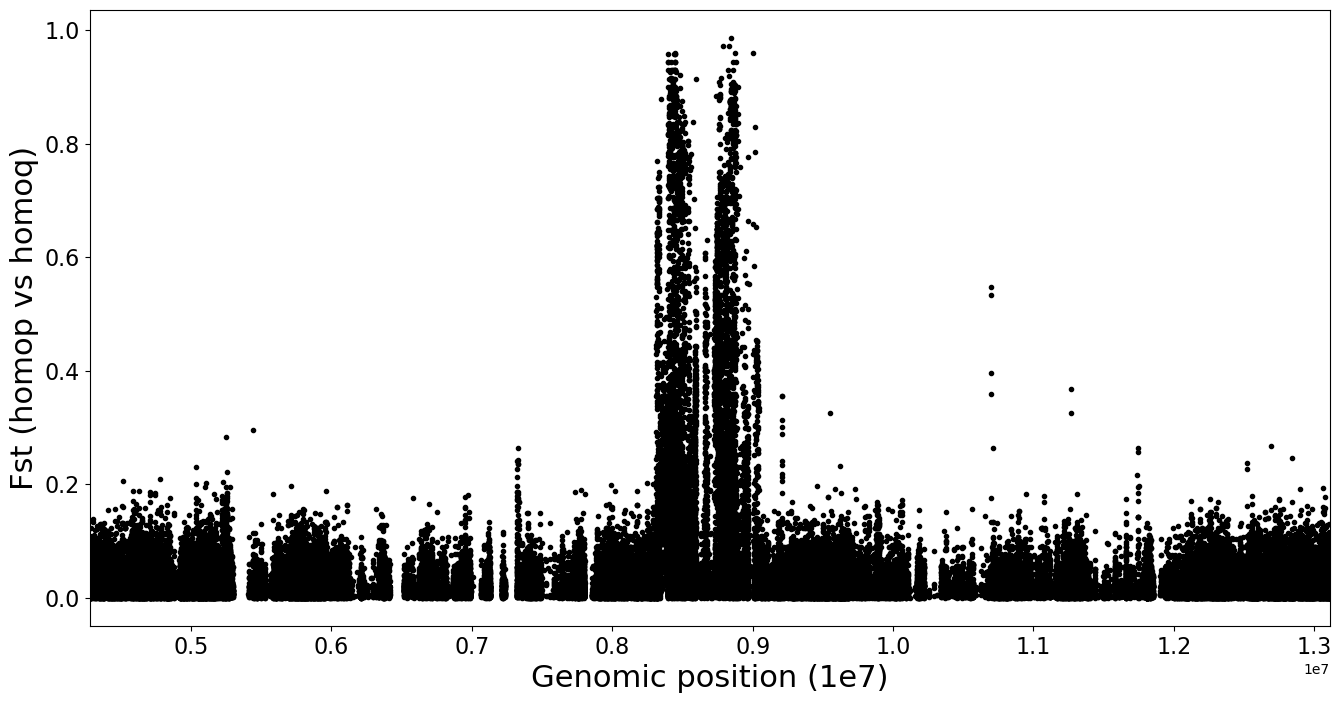

In [41]:
fig, ax1 = plt.subplots(figsize=(16, 8))
plt.plot(df["POS"], df["WEIR_AND_COCKERHAM_FST"], ".",color="black")

#plt.axvline(start, color="red")
#plt.axvline(stop, color="red") 

#plt.axvline(9094120+1_600_000, color="red")
#plt.axvline(9094120+ 1_650_000, color="red")

offset=(stop-start) * 5 #3_000_000
plt.xlim(start-offset,stop+offset)

#print(9094120+1_600_000, 9094120+ 1_650_000)


#plt.axvline(13424367, color="red")
#plt.axvline(15422748, color="red")
#plt.axvline(16793794-450_000, color="red")

plt.ylabel("Fst (homop vs homoq)", fontsize=22)
plt.xlabel("Genomic position (1e7)", fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=16)


plt.savefig("figs/603_fst.pdf", format='pdf')

In [98]:
#get genes
colnames=["chr", 'id1',"type","start","stop","n1","ori","n2","other"]
df=pd.read_csv("supp_files/no_header_genomic.gff", sep="\t", header=None, names=colnames)
df

,chr,id1,type,start,stop,n1,ori,n2,other
0,NW_022144746.1,RefSeq,region,1,64836,.,+,.,ID=NW_022144746.1:1..64836;Dbxref=taxon:7668;N...
1,NW_022144747.1,RefSeq,region,1,60028,.,+,.,ID=NW_022144747.1:1..60028;Dbxref=taxon:7668;N...
2,NW_022144748.1,RefSeq,region,1,57988,.,+,.,ID=NW_022144748.1:1..57988;Dbxref=taxon:7668;N...
3,NW_022144748.1,Gnomon,gene,36453,54759,.,+,.,ID=gene-LOC115919120;Dbxref=GeneID:115919120;N...
4,NW_022144748.1,Gnomon,mRNA,36453,54759,.,+,.,ID=rna-XM_030979588.1;Parent=gene-LOC115919120...
...,...,...,...,...,...,...,...,...,...
931821,NC_001453.1,RefSeq,promoter,14478,14487,.,+,.,ID=id-NC_001453.1:14478..14487;gbkey=promoter
931822,NC_001453.1,RefSeq,gene,14509,15650,.,+,.,ID=gene-CYTB;Dbxref=GeneID:2652727;Name=CYTB;g...
931823,NC_001453.1,RefSeq,mRNA,14509,15650,.,+,.,ID=rna-CYTB;Parent=gene-CYTB;Dbxref=GeneID:265...
931824,NC_001453.1,RefSeq,exon,14509,15650,.,+,.,ID=exon-CYTB-1;Parent=rna-CYTB;Dbxref=GeneID:2...


802860


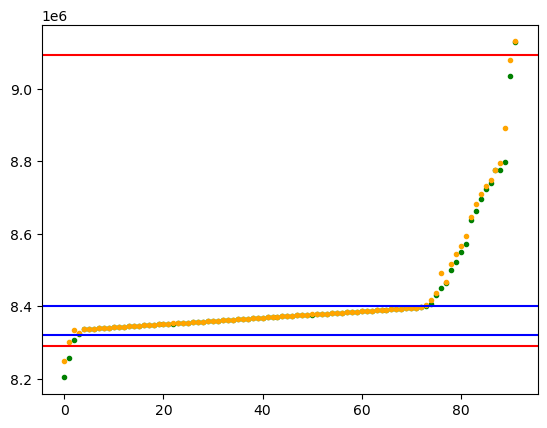

In [116]:
print(stop-start)
ndf=df[(df["chr"]==chr) & (df["start"]>=start-100_000) & (df["stop"]<=stop+100_000)] #& (df["type"]=="gene") ]
ndf = ndf[ndf['type'].str.contains("gene", na=False)]
ndf["len"]= ndf["stop"]-ndf["start"]
ndf = ndf.sort_values(by="start")
plt.plot(ndf.start.to_list(),".",color="green")
plt.plot(ndf.stop.to_list(),".",color="orange")
plt.axhline(start, color="red")
plt.axhline(stop, color="red")

plt.axhline(start+30_000, color="blue")
plt.axhline(start+110_000, color="blue")

(array([ 2., 61., 15.,  4.,  2.,  3.,  3.,  0.,  1.,  1.]),
 array([8203599. , 8296197.2, 8388795.4, 8481393.6, 8573991.8, 8666590. ,
        8759188.2, 8851786.4, 8944384.6, 9036982.8, 9129581. ]),
 <BarContainer object of 10 artists>)

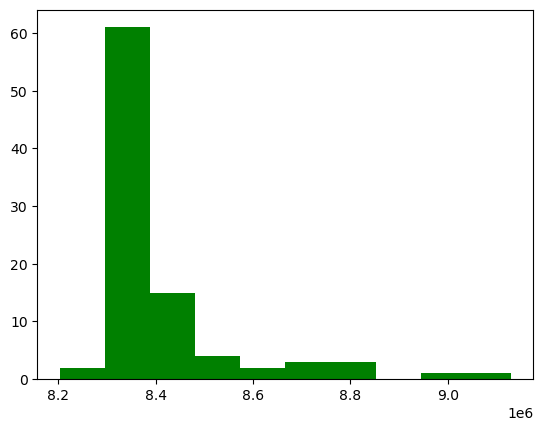

In [110]:
plt.hist(ndf.start.to_list(),color="green")

In [35]:
chr="NW_022145603.1"
start, stop=8291260, 9094120 #28950395, 29566247
#stop=34582517

rdf=pd.read_csv("supp_files/Spur_repeats_02", sep="\t", header=None, skiprows=2,names=["chr","start","stop"])
rdf=rdf[(rdf["chr"]==chr)] #& (rdf["start"]>=start-1_000_000) & (rdf["stop"]<=stop+1_000_000)]
rdf

,chr,start,stop
861229,NW_022145603.1,4,138
861230,NW_022145603.1,151,335
861231,NW_022145603.1,348,544
861232,NW_022145603.1,557,755
861233,NW_022145603.1,767,958
...,...,...,...
946742,NW_022145603.1,34279202,34281723
946743,NW_022145603.1,34280782,34282788
946744,NW_022145603.1,34282768,34282938
946745,NW_022145603.1,34282939,34284451


/users/c/p/cpetak/miniconda3/envs/wgs/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


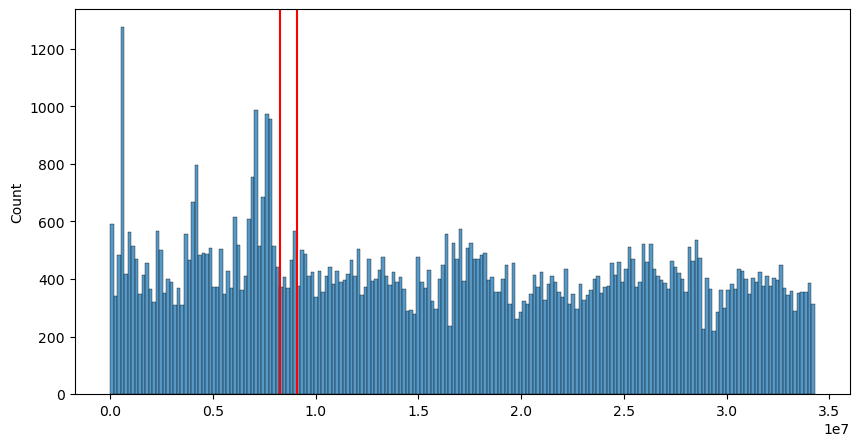

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 5))

sns.histplot(rdf.start.to_list(),bins=200)


plt.axvline(start,color="red")
plt.axvline(stop,color="red")

In [ ]:
rdf["len"] = rdf["stop"] - rdf["start"]
#rdf[(rdf["start"]>=start+30_000) & (rdf["stop"]<=start+110_000)]
rdf[(rdf["start"]>=8336607) & (rdf["stop"]<=start+110_000)] #8337498	8337618

,chr,start,stop,len
886471,NW_022145603.1,8336616,8336731,115
886472,NW_022145603.1,8337507,8337619,112
886473,NW_022145603.1,8338392,8338502,110
886474,NW_022145603.1,8339282,8339392,110
886475,NW_022145603.1,8340166,8340276,110
...,...,...,...,...
886546,NW_022145603.1,8399472,8399652,180
886547,NW_022145603.1,8399700,8399820,120
886548,NW_022145603.1,8400886,8400967,81
886549,NW_022145603.1,8400927,8400975,48


(array([9., 6., 2., 0., 9., 4., 5., 4., 7., 2., 1., 2., 2., 2., 1., 2., 2.,
        2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 1.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 1., 2., 2., 2., 3., 4., 5.]),
 array([8321647.  , 8323234.08, 8324821.16, 8326408.24, 8327995.32,
        8329582.4 , 8331169.48, 8332756.56, 8334343.64, 8335930.72,
        8337517.8 , 8339104.88, 8340691.96, 8342279.04, 8343866.12,
        8345453.2 , 8347040.28, 8348627.36, 8350214.44, 8351801.52,
        8353388.6 , 8354975.68, 8356562.76, 8358149.84, 8359736.92,
        8361324.  , 8362911.08, 8364498.16, 8366085.24, 8367672.32,
        8369259.4 , 8370846.48, 8372433.56, 8374020.64, 8375607.72,
        8377194.8 , 8378781.88, 8380368.96, 8381956.04, 8383543.12,
        8385130.2 , 8386717.28, 8388304.36, 8389891.44, 8391478.52,
        8393065.6 , 8394652.68, 8396239.76, 8397826.84, 8399413.92,
        8401001.  ]),
 <BarContainer object of 50 artists>)

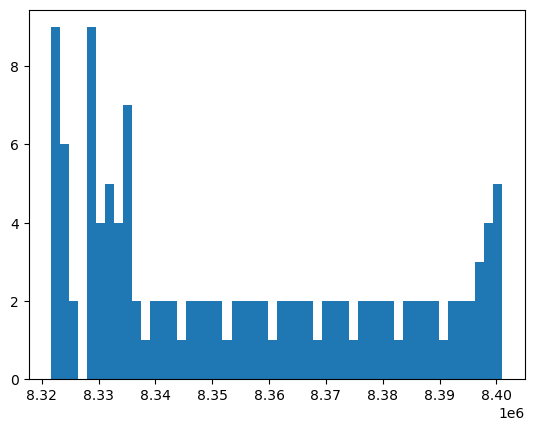

In [129]:
plt.hist(rdf[(rdf["start"]>=start+30_000) & (rdf["stop"]<=start+110_000)].start.to_list(),bins=50)

(array([1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 2., 1., 2., 2., 1., 2.,
        2., 1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2.,
        1., 2., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 2., 1., 2., 1.]),
 array([8323249.  , 8324743.98, 8326238.96, 8327733.94, 8329228.92,
        8330723.9 , 8332218.88, 8333713.86, 8335208.84, 8336703.82,
        8338198.8 , 8339693.78, 8341188.76, 8342683.74, 8344178.72,
        8345673.7 , 8347168.68, 8348663.66, 8350158.64, 8351653.62,
        8353148.6 , 8354643.58, 8356138.56, 8357633.54, 8359128.52,
        8360623.5 , 8362118.48, 8363613.46, 8365108.44, 8366603.42,
        8368098.4 , 8369593.38, 8371088.36, 8372583.34, 8374078.32,
        8375573.3 , 8377068.28, 8378563.26, 8380058.24, 8381553.22,
        8383048.2 , 8384543.18, 8386038.16, 8387533.14, 8389028.12,
        8390523.1 , 8392018.08, 8393513.06, 8395008.04, 8396503.02,
        8397998.  ]),
 <BarContainer object of 50 artists>)

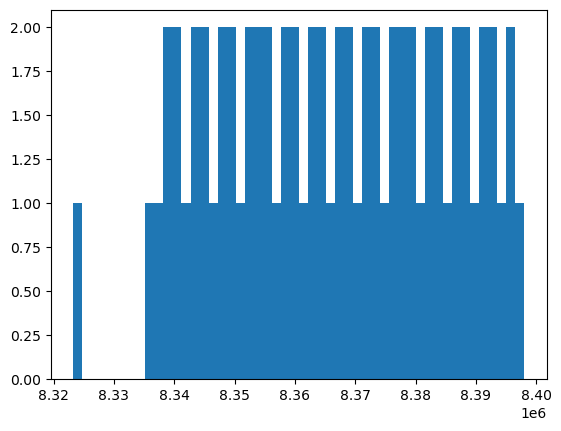

In [136]:
plt.hist(ndf[(ndf["start"]>=start+30_000) & (ndf["stop"]<=start+110_000)].start.to_list(),bins=50)

In [ ]:
ndf[(ndf["start"]>=start+30_000) & (ndf["stop"]<=start+110_000)]

,chr,id1,type,start,stop,n1,ori,n2,other,len
409554,NW_022145603.1,Gnomon,gene,8323249,8326828,.,+,.,ID=gene-LOC115925400;Dbxref=GeneID:115925400;N...,3579
409559,NW_022145603.1,cmsearch,pseudogene,8336607,8336730,.,-,.,ID=gene-LOC115925746;Dbxref=GeneID:115925746;N...,123
409561,NW_022145603.1,cmsearch,pseudogene,8337498,8337618,.,-,.,ID=gene-LOC115925738;Dbxref=GeneID:115925738;N...,120
409563,NW_022145603.1,cmsearch,pseudogene,8338383,8338501,.,-,.,ID=gene-LOC115925593;Dbxref=GeneID:115925593;N...,118
409565,NW_022145603.1,cmsearch,pseudogene,8339273,8339391,.,-,.,ID=gene-LOC115925711;Dbxref=GeneID:115925711;N...,118
...,...,...,...,...,...,...,...,...,...,...
409687,NW_022145603.1,cmsearch,pseudogene,8393358,8393476,.,-,.,ID=gene-LOC115925607;Dbxref=GeneID:115925607;N...,118
409689,NW_022145603.1,cmsearch,pseudogene,8394245,8394363,.,-,.,ID=gene-LOC115925609;Dbxref=GeneID:115925609;N...,118
409691,NW_022145603.1,cmsearch,pseudogene,8395134,8395252,.,-,.,ID=gene-LOC115925608;Dbxref=GeneID:115925608;N...,118
409693,NW_022145603.1,cmsearch,pseudogene,8396026,8396144,.,-,.,ID=gene-LOC115925611;Dbxref=GeneID:115925611;N...,118


In [128]:
Counter(ndf[(ndf["start"]>=start+30_000) & (ndf["stop"]<=start+110_000)].len.to_list())

Counter({118: 67, 3579: 1, 123: 1, 120: 1})

In [ ]:
#DOUBLE CHECKING NON REP FILTERING BELOW

In [81]:
chr="NW_022145603.1"
start=8291260
stop=9094120
odf=pd.read_csv(f"~/EG2023/structural_variation/filtered_bcf_files/{chr}/{chr}_filtered.vcf", sep="\t",comment='#',header=None)
odf=odf[(odf.iloc[:, 0]==chr) & (odf.iloc[:, 1]>=start-100_000) & (odf.iloc[:, 1]<=stop+100_000)]
odf

,0,1,2,3,4,5,6,7,8,9,...,136,137,138,139,140,141,142,143,144,145
53099,NW_022145603.1,8198229,.,C,T,999.0,.,DP=840;VDB=0.778861;SGB=51.0219;RPB=0.890968;M...,GT:PL,"0/0:0,12,113",...,"0/0:0,24,179","0/0:0,21,201","0/0:0,9,127","0/0:0,9,105","0/0:0,21,183","0/1:140,0,19","0/0:0,27,223","0/0:0,15,123","0/0:0,6,67","0/0:0,6,64"
53100,NW_022145603.1,8198242,.,A,G,999.0,.,DP=777;VDB=0.00184215;SGB=16.8005;RPB=0.072973...,GT:PL,"0/0:0,9,92",...,"0/1:114,0,50","1/1:201,21,0","0/0:0,6,97","1/1:105,9,0","1/1:152,15,0","1/1:183,15,0","0/0:0,24,215","1/1:113,12,0","0/1:0,3,37","0/1:0,3,37"
53101,NW_022145603.1,8198243,.,C,T,999.0,.,DP=777;VDB=0.0735522;SGB=58.1216;RPB=0.78896;M...,GT:PL,"0/0:0,9,92",...,"0/0:0,21,176","0/1:48,0,147","0/0:0,6,66","0/0:0,9,94","0/0:0,15,152","0/0:0,18,214","0/0:0,24,206","0/0:0,12,113","0/0:0,3,37","0/0:0,3,37"
53102,NW_022145603.1,8198250,.,G,T,999.0,.,DP=775;VDB=0.000183569;SGB=89.2414;RPB=0.79346...,GT:PL,"1/1:92,9,0",...,"0/1:74,0,111","0/0:0,24,211","0/1:88,0,16","0/0:0,9,105","0/0:0,15,152","0/0:0,18,221","0/1:66,0,111","0/0:0,15,129","0/0:0,3,37","0/0:0,3,37"
53103,NW_022145603.1,8198255,.,C,T,999.0,.,DP=769;VDB=5.13466e-05;SGB=89.0264;RPB=0.91497...,GT:PL,"1/1:84,9,0",...,"0/1:74,0,111","0/0:0,21,201","0/1:97,6,0","0/0:0,9,105","0/0:0,12,130","0/0:0,15,192","0/1:74,0,111","0/0:0,15,129","0/0:0,3,37","0/0:0,3,37"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60803,NW_022145603.1,9192200,.,G,A,999.0,.,DP=967;VDB=0.989227;SGB=-67.1954;RPB=0.13647;M...,GT:PL,"1/1:213,27,0",...,"0/1:71,0,139","1/1:161,18,0","1/1:179,18,0","1/1:113,12,0","1/1:113,12,0","1/1:252,30,0","1/1:251,27,0","1/1:215,24,0","1/1:200,21,0","1/1:123,15,0"
60804,NW_022145603.1,9192422,.,A,T,999.0,.,DP=948;VDB=0.246001;SGB=37.8251;RPB=0.911619;M...,GT:PL,"0/0:0,15,183",...,"0/0:0,15,182","0/0:0,15,160","0/0:0,24,221","0/0:0,6,67","0/0:0,15,183","0/1:39,0,163","0/0:0,18,185","0/0:0,24,162","0/0:0,21,178","0/0:0,15,150"
60805,NW_022145603.1,9192879,.,T,A,958.0,.,DP=973;VDB=0.610761;SGB=15.0875;RPB=0.830848;M...,GT:PL,"0/0:0,6,47",...,"0/0:0,30,255","0/0:0,27,230","0/0:0,24,173","0/0:0,18,195","0/0:0,15,137","0/1:53,0,56","0/0:0,27,237","0/0:0,21,199","0/0:0,21,200","0/0:0,15,151"
60806,NW_022145603.1,9193715,.,T,C,999.0,.,DP=836;VDB=0.00801496;SGB=55.8482;RPB=0.812507...,GT:PL,"0/0:0,15,160",...,"0/0:0,15,151","0/0:0,18,182","./.:0,0,0","0/0:0,18,168","0/0:0,21,215","0/0:0,6,110","0/0:0,12,158","0/1:46,0,56","0/0:0,36,255","0/0:0,39,255"


In [83]:
# Check if each value falls within any region
odf['in_region'] = odf.iloc[:, 1].apply(
    lambda x: any((x >= rdf['start']) & (x <= rdf['stop']))
)

# Print results
print(odf)


                    0        1  2  3  4      5  6  \
53099  NW_022145603.1  8198229  .  C  T  999.0  .   
53100  NW_022145603.1  8198242  .  A  G  999.0  .   
53101  NW_022145603.1  8198243  .  C  T  999.0  .   
53102  NW_022145603.1  8198250  .  G  T  999.0  .   
53103  NW_022145603.1  8198255  .  C  T  999.0  .   
...               ...      ... .. .. ..    ... ..   
60803  NW_022145603.1  9192200  .  G  A  999.0  .   
60804  NW_022145603.1  9192422  .  A  T  999.0  .   
60805  NW_022145603.1  9192879  .  T  A  958.0  .   
60806  NW_022145603.1  9193715  .  T  C  999.0  .   
60807  NW_022145603.1  9193754  .  C  T  999.0  .   

                                                       7      8             9  \
53099  DP=840;VDB=0.778861;SGB=51.0219;RPB=0.890968;M...  GT:PL  0/0:0,12,113   
53100  DP=777;VDB=0.00184215;SGB=16.8005;RPB=0.072973...  GT:PL    0/0:0,9,92   
53101  DP=777;VDB=0.0735522;SGB=58.1216;RPB=0.78896;M...  GT:PL    0/0:0,9,92   
53102  DP=775;VDB=0.000183569;SGB=89.24

In [84]:
from collections import Counter
Counter(odf.iloc[:, -1].to_list())

Counter({False: 7709})